# **Sentiment Analysis and Sentiment Prediction with LSTM on Twitter Data for Cars in Indonesia**

# IMPORT DATASET

In [ ]:
#Import Modul yang diperlukan
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Dataset dari GitHub
!mkdir Data
!wget -P Data/ https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/tweets-bm-labelling.csv
df = pd.read_csv("https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/tweets-bm-labelling.csv", low_memory=False, encoding='utf8')
df.head(10)

mkdir: cannot create directory ‘Data’: File exists
--2024-07-19 07:45:18--  https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/tweets-bm-labelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 890374 (870K) [text/plain]
Saving to: ‘Data/tweets-bm-labelling.csv.1’

tweets-bm-labelling 100%[===================>] 869.51K  --.-KB/s    in 0.02s   

2024-07-19 07:45:18 (39.5 MB/s) - ‘Data/tweets-bm-labelling.csv.1’ saved [890374/890374]



id_           created_at       tweetID  \
0    1  2023-01-01 13:50:44  1.609548e+18   
1    2  2023-01-01 11:00:01  1.609505e+18   
2    3   2023-01-02 9:41:59  1.609847e+18   
3    4   2023-01-03 7:19:49  1.610174e+18   
4    5   2023-01-03 2:29:01  1.610101e+18   
5    6  2023-01-03 14:44:53  1.610286e+18   
6    7   2023-01-03 1:59:12  1.610093e+18   
7    8   2023-01-04 3:57:42  1.610486e+18   
8    9   2023-01-04 2:00:06  1.610456e+18   
9   10  2023-01-05 16:12:23  1.611033e+18   

                                               tweet        username  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...    TangselSmkn2   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...            PSSI   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   GampongSuzuki   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...  toyotamedan_id   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...    HoldenKlasik   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...    Liga1Match23   
6  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...    FAM_Malaysia   
7  Terima kasih kepada 65,147 orang penyokong yan...    FAM_Malaysia   
8  ? Pasukan kebangsaan ?? akan bertemu Thailand ...          MFL_MY   
9  For Sale Toyota Crown Lele... Custom 2 pintu.....    HoldenKlasik   

                id_str                       name      entity      likes  \
0  1414792059257380864               SMKN2Tangsel    Daihatsu        NaN   
1           2363027508                       PSSI  Mitsubishi  1837302.0   
2            971377286             Gampong Suzuki      Suzuki      140.0   
3            732457105  Toyota Medan 082167506001      Toyota      642.0   
4           1391235014             Suka Mobil Tua         BMW   154655.0   
5  1432645187348492289         BRI Liga 1 2023/24  Mitsubishi     7627.0   
6           3191632944                FA Malaysia  Mitsubishi   183527.0   
7           3191632944                FA Malaysia  Mitsubishi   183618.0   
8           3247390147  Malaysian Football League  Mitsubishi   126569.0   
9           1391235014             Suka Mobil Tua      Toyota   154264.0   

   retweets   quotes  replies sentiment  bidang  gender  \
0       NaN      NaN        1    Netral     NaN     NaN   
1     159.0  24686.0       31    Netral     NaN     NaN   
2      72.0   1510.0        0   Positif     NaN     NaN   
3       1.0    757.0        0    Netral     NaN     NaN   
4     402.0  96590.0        1    Netral     NaN     NaN   
5      30.0   5000.0        6    Netral     NaN     NaN   
6      63.0  18353.0        9    Netral     NaN     NaN   
7      63.0  18371.0       17   Positif     NaN     NaN   
8      44.0  36718.0        3   Positif     NaN     NaN   
9     403.0  96531.0        1   Positif     NaN     NaN   

                                                link  \
0                   https://twitter.com/TangselSmkn2   
1  https://twitter.com/PSSI/status/16095047120127...   
2  https://twitter.com/GampongSuzuki/status/16098...   
3  https://twitter.com/toyotamedan_id/status/1610...   
4  https://twitter.com/HoldenKlasik/status/161010...   
5  https://twitter.com/Liga1Match23/status/161028...   
6  https://twitter.com/FAM_Malaysia/status/161009...   
7  https://twitter.com/FAM_Malaysia/status/161048...   
8  https://twitter.com/MFL_MY/status/161045600230...   
9  https://twitter.com/HoldenKlasik/status/161103...   

                                            imageUrl  
0  https://pbs.twimg.com/profile_images/155974970...  
1  https://pbs.twimg.com/media/FlYVvBCaUAA-LHy.jp...  
2  https://pbs.twimg.com/media/FldTuxJakAQTrqR.jp...  
3  https://pbs.twimg.com/profile_images/147098860...  
4  https://pbs.twimg.com/media/Flg6NOsaUAAS5FA.jp...  
5  https://pbs.twimg.com/media/FljipyWaYAIbj0g.jp...  
6  https://pbs.twimg.com/media/FlgzZqOacAEWoxj.jp...  
7  https://pbs.twimg.com/media/FlmYFgzacAAl9Yt.jp...  
8  https://pbs.twimg.com/media/Fll8LbBaAAAvVQ5.jp...  
9  https://pbs.twimg.com/media/FluJ2FiakAAdvjm.jp...

# PREPROCESSING

In [ ]:
df.shape

(2124, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_         2124 non-null   int64  
 1   created_at  2124 non-null   object 
 2   tweetID     2124 non-null   float64
 3   tweet       2124 non-null   object 
 4   username    2124 non-null   object 
 5   id_str      2124 non-null   int64  
 6   name        2124 non-null   object 
 7   entity      2124 non-null   object 
 8   likes       1602 non-null   float64
 9   retweets    1602 non-null   float64
 10  quotes      1602 non-null   float64
 11  replies     2124 non-null   int64  
 12  sentiment   2124 non-null   object 
 13  bidang      0 non-null      float64
 14  gender      0 non-null      float64
 15  link        2124 non-null   object 
 16  imageUrl    2119 non-null   object 
dtypes: float64(6), int64(3), object(8)
memory usage: 282.2+ KB


In [ ]:
# Cek Apakah ada nilai NaN
df.isna().sum()

id_              0
created_at       0
tweetID          0
tweet            0
username         0
id_str           0
name             0
entity           0
likes          522
retweets       522
quotes         522
replies          0
sentiment        0
bidang        2124
gender        2124
link             0
imageUrl         5
dtype: int64

In [ ]:
# Cek Jumlah Merk Mobil Masing-Masing
df['entity'].value_counts()

entity
Daihatsu      463
Toyota        457
Suzuki        324
Honda         287
Mitsubishi    232
Wuling        190
Hyundai       145
BMW            11
AUDI            9
Mazda           5
Mercedez        1
Name: count, dtype: int64

In [ ]:
# Cek Jumlah Sentimen
df['sentiment'].value_counts()

sentiment
Netral     990
Positif    625
Negatif    509
Name: count, dtype: int64

In [ ]:
# Cek data tweet yang terduplikasi
df['tweet'].duplicated().sum()

26

In [ ]:
# Hilangkan data tweet yang terduplikasi
dfNew = df.drop_duplicates(subset=['tweet'])
dfNew.shape

(2098, 17)

# Exploratory Data Analysis

## Feature Engineering

In [ ]:
origins = {
    'Toyota': 'Japan',
    'Honda': 'Japan',
    'Daihatsu': 'Japan',
    'Mitsubishi': 'Japan',
    'Suzuki': 'Japan',
    'Mazda': 'Japan',
    'Hyundai': 'South Korea',
    'Wuling': 'China',
    'BMW': 'Germany',
    'Mercedez': 'Germany',
    'AUDI': 'Germany',
}

dfNew['origin'] = dfNew['entity'].map(origins)
dfNew['origin'].value_counts()

<ipython-input-127-910fc049fb41>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['origin'] = dfNew['entity'].map(origins)


origin
Japan          1748
China           185
South Korea     144
Germany          21
Name: count, dtype: int64

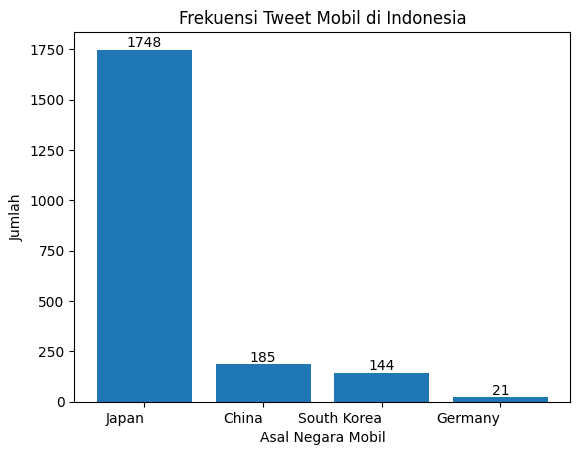

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

origin_counts = dfNew['origin'].value_counts()

plt.bar(origin_counts.index, origin_counts.values)
plt.xlabel('Asal Negara Mobil')
plt.ylabel('Jumlah')
plt.title('Frekuensi Tweet Mobil di Indonesia')
plt.xticks(rotation=0, ha='right')

# Add value labels to the bars
for i, v in enumerate(origin_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Grafik di atas menunjukkan bahwa jumlah tweet mengenai pabrikan mobil Jepang jauh lebih tinggi dibandingkan dengan pabrikan mobil dari negara lain, dengan total 1.748 tweet. Frekuensi tweet mengenai pabrikan mobil Jepang ini bahkan lebih besar daripada gabungan frekuensi tweet mengenai pabrikan dari negara lain. Oleh karena itu, untuk model prediksi sentimen LSTM ini, kami menggunakan tweet yang membahas mobil Jepang. Selain itu, mobil Jepang juga lebih banyak dijumpai di jalanan dibandingkan dengan mobil dari pabrikan lain, sehingga penggunaan tweet mengenai mobil Jepang lebih relevan dan representatif untuk analisis ini.

In [ ]:
# Daftar merek mobil selain Jepang yang ingin dihapus
other_brands = ['BMW', 'Wuling', 'Hyundai', 'AUDI', 'Mercedez']

# Menghapus baris yang kolom 'entity'-nya termasuk dalam daftar other_brands
df_Japan = dfNew[~dfNew['entity'].isin(other_brands)]
df_Japan.shape

(1748, 18)

In [ ]:
df_Japan['entity'].value_counts()

entity
Daihatsu      455
Toyota        455
Suzuki        320
Honda         281
Mitsubishi    232
Mazda           5
Name: count, dtype: int64

In [ ]:
# Visualisasi dataset yang diperlukan
df_tweet = pd.DataFrame(df_Japan['tweet'])
df_tweet.head()

tweet
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...

## Cleaning

Di bawah ini terdapat beberapa fungsi untuk membersihkan teks dari elemen-elemen yang tidak diinginkan seperti URL, tag HTML, emoji, username, angka, dan simbol.

In [ ]:
# Import modul yang diperlukan
import re
import string
import nltk

In [ ]:
def remove_URL(tweet): # Menghapus URL
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_symbols (tweet): # Menghapus simbol
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet

# Visualisasi clean dataset 'tweet'
df_tweet['cleaning'] = df_tweet['tweet'].apply(lambda x: remove_URL(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_html(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_emoji(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_username(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_symbols(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_numbers(x))

df_tweet.head(10)

tweet  \
0   Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1   Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2   SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3   Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
5   Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6   Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7   Terima kasih kepada 65,147 orang penyokong yan...   
8   ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9   For Sale Toyota Crown Lele... Custom 2 pintu.....   
11  CAP BAGASI ERTIGA 2019 BERANGKAT KE BENGKEL MO...   

                                             cleaning  
0   Hallo sobat Nedutase Lepas Sambut Kepala SMK N...  
1   Shin Taeyong selaku pelatih kepala Timnas Indo...  
2   SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...  
3   Baru saja mengirim foto  TOYOTA PERINTIS GATSU...  
5   Semifinal AFF Mitsubishi Electric Cup  Timnas ...  
6   Hari Perlawanan   Selasa  Januari  Kumpulan B ...  
7   Terima kasih kepada  orang penyokong yang hadi...  
8    Pasukan kebangsaan  akan bertemu Thailand  pa...  
9   For Sale Toyota Crown Lele Custom  pintu Kondi...  
11  CAP BAGASI ERTIGA  BERANGKAT KE BENGKEL MOBIL ...

## CASE FOLDING

Merupakan proses mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Tujuan dari case folding adalah untuk mengurangi variasi kata yang disebabkan oleh perbedaan penggunaan huruf besar dan kecil.

In [ ]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

# Visualisasi Perbandingan dataset
df_tweet['case_folding'] = df_tweet['cleaning'].apply(case_folding)

df_tweet.head(10)

tweet  \
0   Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1   Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2   SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3   Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
5   Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6   Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7   Terima kasih kepada 65,147 orang penyokong yan...   
8   ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9   For Sale Toyota Crown Lele... Custom 2 pintu.....   
11  CAP BAGASI ERTIGA 2019 BERANGKAT KE BENGKEL MO...   

                                             cleaning  \
0   Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1   Shin Taeyong selaku pelatih kepala Timnas Indo...   
2   SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3   Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
5   Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6   Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7   Terima kasih kepada  orang penyokong yang hadi...   
8    Pasukan kebangsaan  akan bertemu Thailand  pa...   
9   For Sale Toyota Crown Lele Custom  pintu Kondi...   
11  CAP BAGASI ERTIGA  BERANGKAT KE BENGKEL MOBIL ...   

                                         case_folding  
0   hallo sobat nedutase lepas sambut kepala smk n...  
1   shin taeyong selaku pelatih kepala timnas indo...  
2   suzuki xl  jawabannya tampilan eksterior suzuk...  
3   baru saja mengirim foto  toyota perintis gatsu...  
5   semifinal aff mitsubishi electric cup  timnas ...  
6   hari perlawanan   selasa  januari  kumpulan b ...  
7   terima kasih kepada  orang penyokong yang hadi...  
8    pasukan kebangsaan  akan bertemu thailand  pa...  
9   for sale toyota crown lele custom  pintu kondi...  
11  cap bagasi ertiga  berangkat ke bengkel mobil ...

## TOKENIZATION

Merupakan proses membagi teks menjadi unit-unit yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bahkan karakter. Tujuan dari tokenisasi adalah untuk memudahkan pemrosesan dan analisis teks dengan memecahnya menjadi bagian-bagian yang lebih terstruktur dan mudah diolah.

In [ ]:
def tokenize(text):# Fungsi tokenisasi teks
     tokens = text.split()
     return tokens

# Visualisasi Perbandingan dataset
df_tweet['tokenize'] = df_tweet['case_folding'].apply(tokenize)

df_tweet.head(10)

tweet  \
0   Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1   Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2   SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3   Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
5   Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6   Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7   Terima kasih kepada 65,147 orang penyokong yan...   
8   ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9   For Sale Toyota Crown Lele... Custom 2 pintu.....   
11  CAP BAGASI ERTIGA 2019 BERANGKAT KE BENGKEL MO...   

                                             cleaning  \
0   Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1   Shin Taeyong selaku pelatih kepala Timnas Indo...   
2   SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3   Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
5   Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6   Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7   Terima kasih kepada  orang penyokong yang hadi...   
8    Pasukan kebangsaan  akan bertemu Thailand  pa...   
9   For Sale Toyota Crown Lele Custom  pintu Kondi...   
11  CAP BAGASI ERTIGA  BERANGKAT KE BENGKEL MOBIL ...   

                                         case_folding  \
0   hallo sobat nedutase lepas sambut kepala smk n...   
1   shin taeyong selaku pelatih kepala timnas indo...   
2   suzuki xl  jawabannya tampilan eksterior suzuk...   
3   baru saja mengirim foto  toyota perintis gatsu...   
5   semifinal aff mitsubishi electric cup  timnas ...   
6   hari perlawanan   selasa  januari  kumpulan b ...   
7   terima kasih kepada  orang penyokong yang hadi...   
8    pasukan kebangsaan  akan bertemu thailand  pa...   
9   for sale toyota crown lele custom  pintu kondi...   
11  cap bagasi ertiga  berangkat ke bengkel mobil ...   

                                             tokenize  
0   [hallo, sobat, nedutase, lepas, sambut, kepala...  
1   [shin, taeyong, selaku, pelatih, kepala, timna...  
2   [suzuki, xl, jawabannya, tampilan, eksterior, ...  
3   [baru, saja, mengirim, foto, toyota, perintis,...  
5   [semifinal, aff, mitsubishi, electric, cup, ti...  
6   [hari, perlawanan, selasa, januari, kumpulan, ...  
7   [terima, kasih, kepada, orang, penyokong, yang...  
8   [pasukan, kebangsaan, akan, bertemu, thailand,...  
9   [for, sale, toyota, crown, lele, custom, pintu...  
11  [cap, bagasi, ertiga, berangkat, ke, bengkel, ...

## STOPWORD REMOVAL

Merupakan proses untuk menghapus kata-kata umum yang tidak memiliki banyak makna dalam analisis teks. Stopword adalah kata-kata yang sering muncul dalam teks tetapi biasanya tidak berkontribusi signifikan terhadap pemahaman atau analisis konteks. Contoh stopword dalam bahasa Indonesia termasuk kata seperti "dan", "yang", "adalah", "di", "ke", "dari", dan sebagainya.

In [ ]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/stopwords-id-mobil.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
df_tweet['stopword_removal'] = df_tweet['tokenize'].apply(remove_stopwords)
df_tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
5  semifinal aff mitsubishi electric cup  timnas ...   

                                            tokenize  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, selaku, pelatih, kepala, timna...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [baru, saja, mengirim, foto, toyota, perintis,...   
5  [semifinal, aff, mitsubishi, electric, cup, ti...   

                                    stopword_removal  
0  [hallo, sobat, nedutase, lepas, sambut, kepala...  
1  [shin, taeyong, pelatih, kepala, timnas, didam...  
2  [jawabannya, tampilan, eksterior, tampil, gaga...  
3  [mengirim, foto, perintis, gatsu, medantranslate]  
5  [semifinal, cup, timnas, menghadapi, tuan, due...

## STEMMING

Merupakan proses mengubah kata-kata dalam teks menjadi bentuk dasarnya (root form). Tujuan dari stemming adalah untuk mengurangi variasi kata yang berasal dari perubahan bentuk kata yang berbeda (misalnya, perubahan bentuk kata kerja atau kata benda) sehingga kata-kata dengan makna yang sama dapat dianggap sebagai entitas yang sama. Misalnya, kata-kata "berlari", "berlari-lari", "lari", dan "pelari" semuanya dapat direduksi menjadi bentuk dasar "lari".

In [ ]:
# Install dan Import modul yang diperlukan
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()           # Membuat instance dari StemmerFactory
stemmer = factory.create_stemmer()   # Membuat instance stemmer menggunakan factory

def stem_text(text): # Mendefinisikan fungsi stem_text untuk melakukan stemming pada teks input
    return [stemmer.stem(word) for word in text]

In [ ]:
# Visualisasi perbandingan dataset
df_tweet['stemming'] = df_tweet['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df_tweet.head(10)

tweet  \
0   Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1   Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2   SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3   Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
5   Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6   Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7   Terima kasih kepada 65,147 orang penyokong yan...   
8   ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9   For Sale Toyota Crown Lele... Custom 2 pintu.....   
11  CAP BAGASI ERTIGA 2019 BERANGKAT KE BENGKEL MO...   

                                             cleaning  \
0   Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1   Shin Taeyong selaku pelatih kepala Timnas Indo...   
2   SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3   Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
5   Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6   Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7   Terima kasih kepada  orang penyokong yang hadi...   
8    Pasukan kebangsaan  akan bertemu Thailand  pa...   
9   For Sale Toyota Crown Lele Custom  pintu Kondi...   
11  CAP BAGASI ERTIGA  BERANGKAT KE BENGKEL MOBIL ...   

                                         case_folding  \
0   hallo sobat nedutase lepas sambut kepala smk n...   
1   shin taeyong selaku pelatih kepala timnas indo...   
2   suzuki xl  jawabannya tampilan eksterior suzuk...   
3   baru saja mengirim foto  toyota perintis gatsu...   
5   semifinal aff mitsubishi electric cup  timnas ...   
6   hari perlawanan   selasa  januari  kumpulan b ...   
7   terima kasih kepada  orang penyokong yang hadi...   
8    pasukan kebangsaan  akan bertemu thailand  pa...   
9   for sale toyota crown lele custom  pintu kondi...   
11  cap bagasi ertiga  berangkat ke bengkel mobil ...   

                                             tokenize  \
0   [hallo, sobat, nedutase, lepas, sambut, kepala...   
1   [shin, taeyong, selaku, pelatih, kepala, timna...   
2   [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3   [baru, saja, mengirim, foto, toyota, perintis,...   
5   [semifinal, aff, mitsubishi, electric, cup, ti...   
6   [hari, perlawanan, selasa, januari, kumpulan, ...   
7   [terima, kasih, kepada, orang, penyokong, yang...   
8   [pasukan, kebangsaan, akan, bertemu, thailand,...   
9   [for, sale, toyota, crown, lele, custom, pintu...   
11  [cap, bagasi, ertiga, berangkat, ke, bengkel, ...   

                                     stopword_removal  \
0   [hallo, sobat, nedutase, lepas, sambut, kepala...   
1   [shin, taeyong, pelatih, kepala, timnas, didam...   
2   [jawabannya, tampilan, eksterior, tampil, gaga...   
3   [mengirim, foto, perintis, gatsu, medantranslate]   
5   [semifinal, cup, timnas, menghadapi, tuan, due...   
6   [perlawanan, selasa, januari, kumpulan, malays...   
7   [terima, kasih, penyokong, hadir, menyaksikan,...   
8   [pasukan, kebangsaan, bertemu, thailand, aksi,...   
9   [for, sale, crown, lele, custom, pintu, kondis...   
11  [cap, bagasi, berangkat, bengkel, gresik, jawa...   

                                             stemming  
0   hallo sobat nedutase lepas sambut kepala smk t...  
1   shin taeyong latih kepala timnas damping ricky...  
2   jawab tampil eksterior tampil gagah grill hadi...  
3              kirim foto rintis gatsu medantranslate  
5   semifinal cup timnas hadap tuan duel shin tae ...  
6   lawan selasa januari kumpul malaysia singapura...  
7   terima kasih sokong hadir saksi aksi kumpul ma...  
8   pasu bangsa temu thailand aksi timbal peringka...  
9   for sale crown lele custom pintu kondisi rapi ...  
11     cap bagasi berangkat bengkel gresik jawa timur

In [ ]:
# Pastikan df_Japan dan df_tweet memiliki jumlah baris yang sama
if len(df_Japan) == len(df_tweet):
    # Membuat DataFrame baru dengan kolom-kolom dari df_tweet dan tambahan kolom 'entity' dan 'sentiment' dari df_Japan
    dfEDA = df_tweet.copy()  # Menyalin df_tweet untuk membuat dfEDA
    dfEDA['entity'] = df_Japan['entity']
    dfEDA['sentiment'] = df_Japan['sentiment']
else:
    raise ValueError("Jumlah baris di df_Japan dan df_tweet tidak cocok.")

In [ ]:
dfEDA.head()

tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
5  semifinal aff mitsubishi electric cup  timnas ...   

                                            tokenize  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, selaku, pelatih, kepala, timna...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [baru, saja, mengirim, foto, toyota, perintis,...   
5  [semifinal, aff, mitsubishi, electric, cup, ti...   

                                    stopword_removal  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, pelatih, kepala, timnas, didam...   
2  [jawabannya, tampilan, eksterior, tampil, gaga...   
3  [mengirim, foto, perintis, gatsu, medantranslate]   
5  [semifinal, cup, timnas, menghadapi, tuan, due...   

                                            stemming      entity sentiment  
0  hallo sobat nedutase lepas sambut kepala smk t...    Daihatsu    Netral  
1  shin taeyong latih kepala timnas damping ricky...  Mitsubishi    Netral  
2  jawab tampil eksterior tampil gagah grill hadi...      Suzuki   Positif  
3             kirim foto rintis gatsu medantranslate      Toyota    Netral  
5  semifinal cup timnas hadap tuan duel shin tae ...  Mitsubishi    Netral

## Save EDA

In [ ]:
dfEDA.to_csv('Hasil-EDA-DeepL.csv',encoding='utf8',index=False)

# Data Visualization

In [ ]:
#Import Dataset dari GitHub
!mkdir Data
!wget -P Data/ https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/Hasil-EDA-DeepL.csv
dfEDA = pd.read_csv("https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/Hasil-EDA-DeepL.csv", low_memory=False, encoding='utf8')
dfEDA.head(10)

mkdir: cannot create directory ‘Data’: File exists
--2024-07-20 02:38:50--  https://raw.githubusercontent.com/alvinhugo/DeepLearning-FinPro/main/Hasil-EDA-DeepL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1524762 (1.5M) [text/plain]
Saving to: ‘Data/Hasil-EDA-DeepL.csv.1’

Hasil-EDA-DeepL.csv 100%[===================>]   1.45M  --.-KB/s    in 0.008s  

2024-07-20 02:38:50 (181 MB/s) - ‘Data/Hasil-EDA-DeepL.csv.1’ saved [1524762/1524762]



tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
5  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
6  Terima kasih kepada 65,147 orang penyokong yan...   
7  ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
8  For Sale Toyota Crown Lele... Custom 2 pintu.....   
9  CAP BAGASI ERTIGA 2019 BERANGKAT KE BENGKEL MO...   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
4  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
5  Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
6  Terima kasih kepada  orang penyokong yang hadi...   
7   Pasukan kebangsaan  akan bertemu Thailand  pa...   
8  For Sale Toyota Crown Lele Custom  pintu Kondi...   
9  CAP BAGASI ERTIGA  BERANGKAT KE BENGKEL MOBIL ...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
4  semifinal aff mitsubishi electric cup  timnas ...   
5  hari perlawanan   selasa  januari  kumpulan b ...   
6  terima kasih kepada  orang penyokong yang hadi...   
7   pasukan kebangsaan  akan bertemu thailand  pa...   
8  for sale toyota crown lele custom  pintu kondi...   
9  cap bagasi ertiga  berangkat ke bengkel mobil ...   

                                            tokenize  \
0  ['hallo', 'sobat', 'nedutase', 'lepas', 'sambu...   
1  ['shin', 'taeyong', 'selaku', 'pelatih', 'kepa...   
2  ['suzuki', 'xl', 'jawabannya', 'tampilan', 'ek...   
3  ['baru', 'saja', 'mengirim', 'foto', 'toyota',...   
4  ['semifinal', 'aff', 'mitsubishi', 'electric',...   
5  ['hari', 'perlawanan', 'selasa', 'januari', 'k...   
6  ['terima', 'kasih', 'kepada', 'orang', 'penyok...   
7  ['pasukan', 'kebangsaan', 'akan', 'bertemu', '...   
8  ['for', 'sale', 'toyota', 'crown', 'lele', 'cu...   
9  ['cap', 'bagasi', 'ertiga', 'berangkat', 'ke',...   

                                    stopword_removal  \
0  ['hallo', 'sobat', 'nedutase', 'lepas', 'sambu...   
1  ['shin', 'taeyong', 'pelatih', 'kepala', 'timn...   
2  ['jawabannya', 'tampilan', 'eksterior', 'tampi...   
3  ['mengirim', 'foto', 'perintis', 'gatsu', 'med...   
4  ['semifinal', 'cup', 'timnas', 'menghadapi', '...   
5  ['perlawanan', 'selasa', 'januari', 'kumpulan'...   
6  ['terima', 'kasih', 'penyokong', 'hadir', 'men...   
7  ['pasukan', 'kebangsaan', 'bertemu', 'thailand...   
8  ['for', 'sale', 'crown', 'lele', 'custom', 'pi...   
9  ['cap', 'bagasi', 'berangkat', 'bengkel', 'gre...   

                                            stemming      entity sentiment  
0  hallo sobat nedutase lepas sambut kepala smk t...    Daihatsu    Netral  
1  shin taeyong latih kepala timnas damping ricky...  Mitsubishi    Netral  
2  jawab tampil eksterior tampil gagah grill hadi...      Suzuki   Positif  
3             kirim foto rintis gatsu medantranslate      Toyota    Netral  
4  semifinal cup timnas hadap tuan duel shin tae ...  Mitsubishi    Netral  
5  lawan selasa januari kumpul malaysia singapura...  Mitsubishi    Netral  
6  terima kasih sokong hadir saksi aksi kumpul ma...  Mitsubishi   Positif  
7  pasu bangsa temu thailand aksi timbal peringka...  Mitsubishi   Positif  
8  for sale crown lele custom pintu kondisi rapi ...      Toyota   Positif  
9     cap bagasi berangkat bengkel gresik jawa timur      Suzuki    Netral

### Frequency

In [ ]:
dfEDA['sentiment'].value_counts()

sentiment
Netral     813
Negatif    471
Positif    464
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

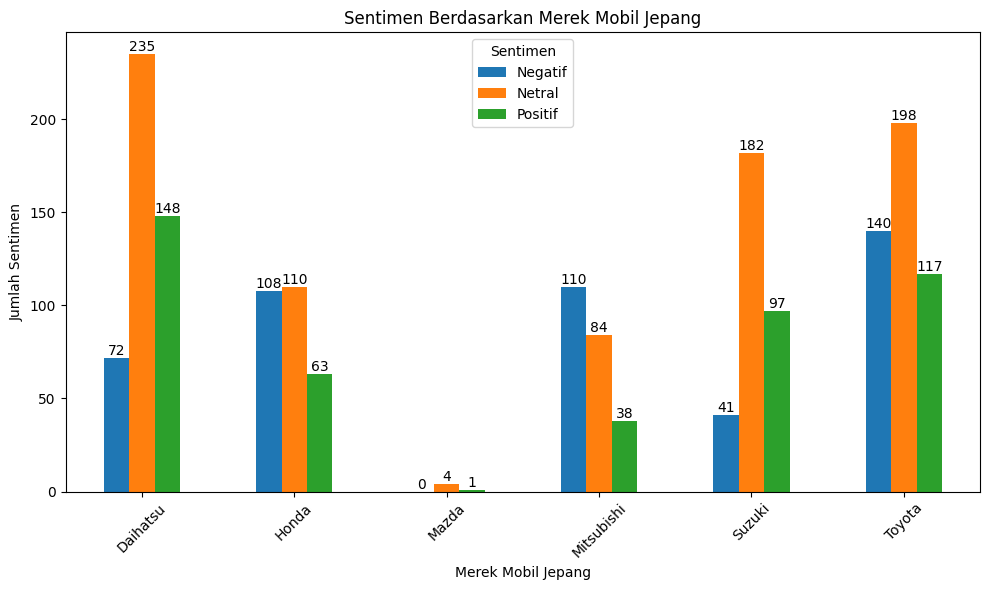

In [ ]:
# Menghitung jumlah sentimen per entitas
sentiment_count = dfEDA.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)

# Membuat plot
plt.figure(figsize=(10, 6))

# Plotting
ax = sentiment_count.plot(kind='bar', figsize=(10, 6))

plt.title('Sentimen Berdasarkan Merek Mobil Jepang')
plt.xlabel('Merek Mobil Jepang')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen')
plt.tight_layout()

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Menampilkan plot
plt.show()

Grafik di atas menunjukkan distribusi sentimen untuk berbagai merek mobil Jepang di Indonesia. Berikut adalah beberapa poin penting dari grafik tersebut:

1. Daihatsu:
* Daihatsu memiliki jumlah sentimen tertinggi dengan total 455 tweet.
* Sentimen netral mendominasi dengan 235 tweet, diikuti oleh sentimen positif dengan 148 tweet, dan sentimen negatif dengan 72 tweet.

2. Toyota:

* Toyota berada di posisi kedua dengan total 455 tweet, sama dengan Daihatsu.
* Sentimen netral juga mendominasi dengan 198 tweet,
diikuti oleh sentimen negatif dengan 140 tweet, dan sentimen positif dengan 117 tweet.
3. Honda:

* Honda memiliki total 281 tweet.
* Sentimen netral mendominasi dengan 110 tweet, diikuti oleh sentimen negatif dengan 108 tweet, dan sentimen positif dengan 63 tweet.
4. Suzuki:

* Suzuki memiliki total 320 tweet.
* Sentimen netral mendominasi dengan 182 tweet, diikuti oleh sentimen positif dengan 97 tweet, dan sentimen negatif dengan 41 tweet.
5. Mitsubishi:

* Mitsubishi memiliki total 232 tweet.
* Sentimen netral mendominasi dengan 110 tweet, diikuti oleh sentimen negatif dengan 84 tweet, dan sentimen positif dengan 38 tweet.
6. Mazda:

* Mazda memiliki jumlah sentimen terendah dengan total 5 tweet.
* Sentimen netral mendominasi dengan 4 tweet, dan sentimen positif dengan 1 tweet, tanpa adanya sentimen negatif.

Daihatsu dan Toyota, meskipun keduanya merupakan dua pabrikan terlaris di Indonesia, memiliki jumlah sentimen yang berbeda di tiap kategori. Daihatsu cenderung mendapatkan lebih banyak sentimen netral dibandingkan dengan Toyota. Sementara itu, Suzuki dan Honda mengikuti di posisi ketiga dan keempat dalam hal total sentimen. Mitsubishi dan Mazda memiliki jumlah sentimen yang lebih sedikit dibandingkan dengan empat merek lainnya.

### WordCloud

In [ ]:
!pip install wordcloud

<ipython-input-17-1fe73374c008>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['stemming'] = df_positif['stemming'].astype(str)
<ipython-input-17-1fe73374c008>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif['stemming'] = df_negatif['stemming'].astype(str)


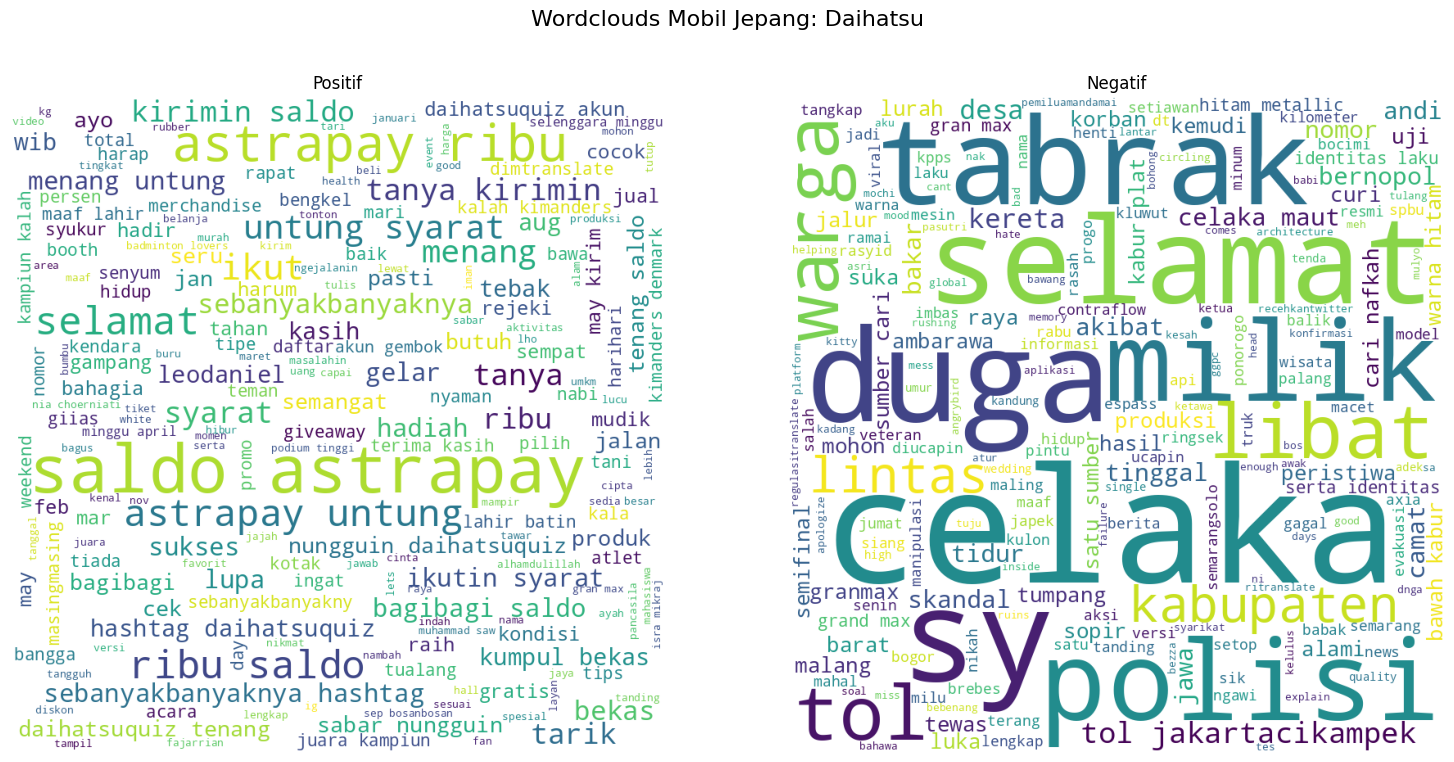

<ipython-input-17-1fe73374c008>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['stemming'] = df_positif['stemming'].astype(str)
<ipython-input-17-1fe73374c008>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif['stemming'] = df_negatif['stemming'].astype(str)


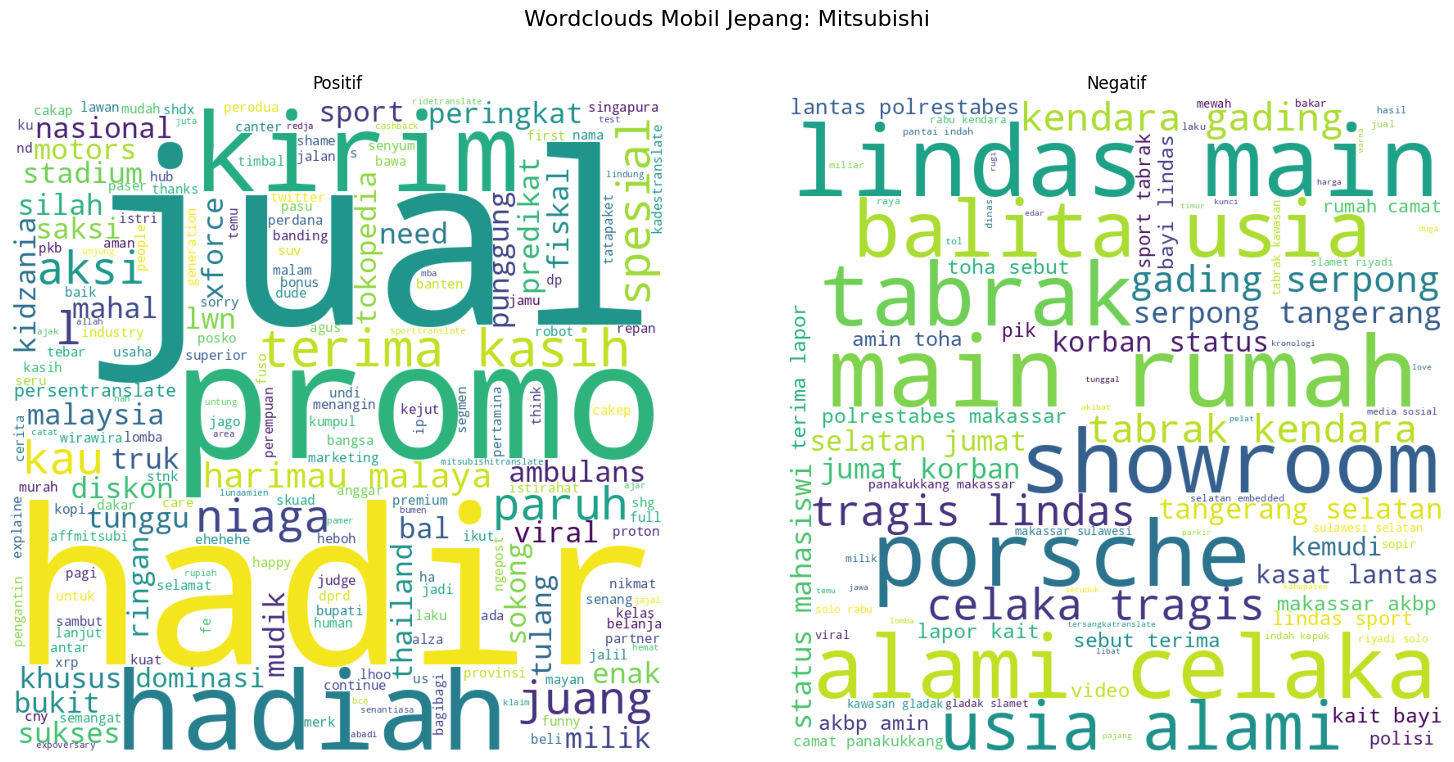

<ipython-input-17-1fe73374c008>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['stemming'] = df_positif['stemming'].astype(str)
<ipython-input-17-1fe73374c008>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif['stemming'] = df_negatif['stemming'].astype(str)


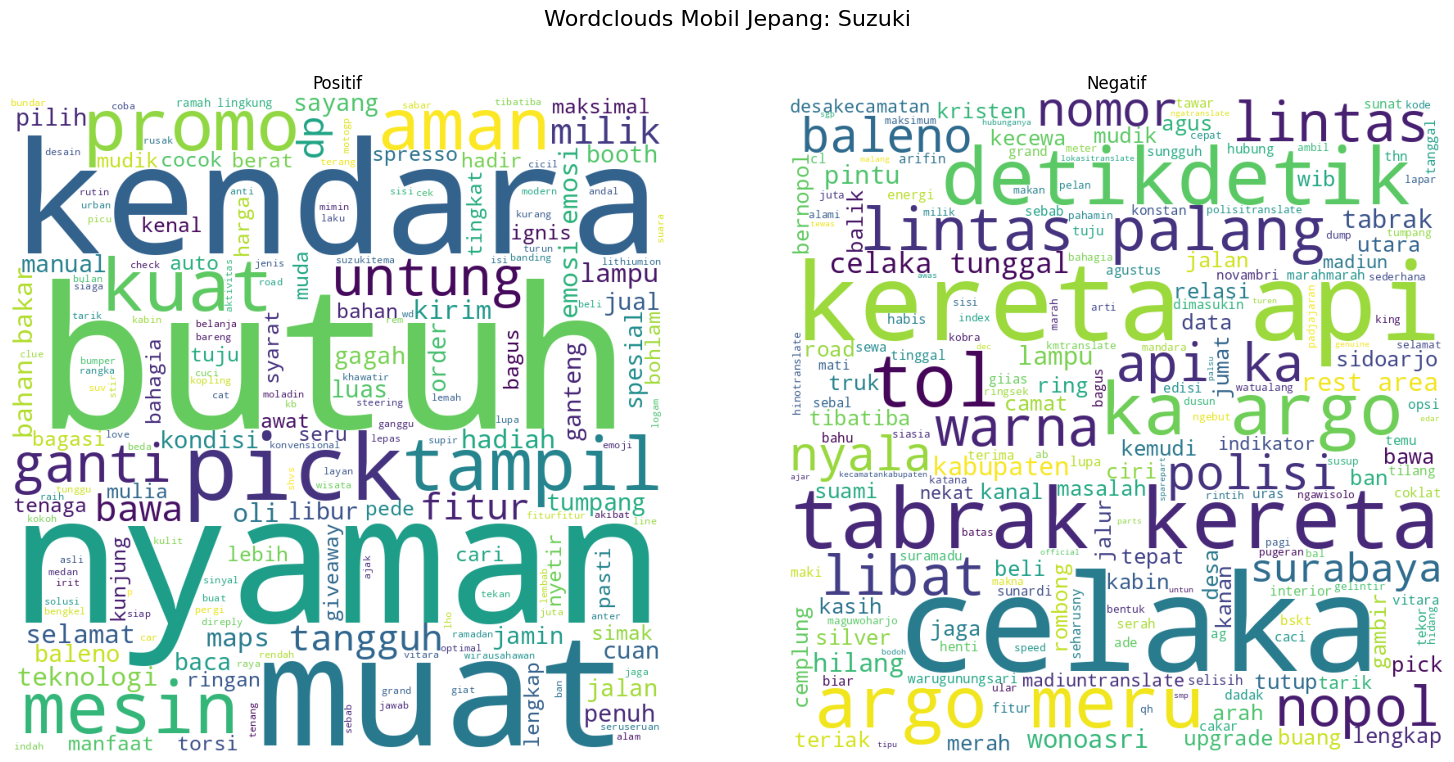

<ipython-input-17-1fe73374c008>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['stemming'] = df_positif['stemming'].astype(str)
<ipython-input-17-1fe73374c008>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif['stemming'] = df_negatif['stemming'].astype(str)


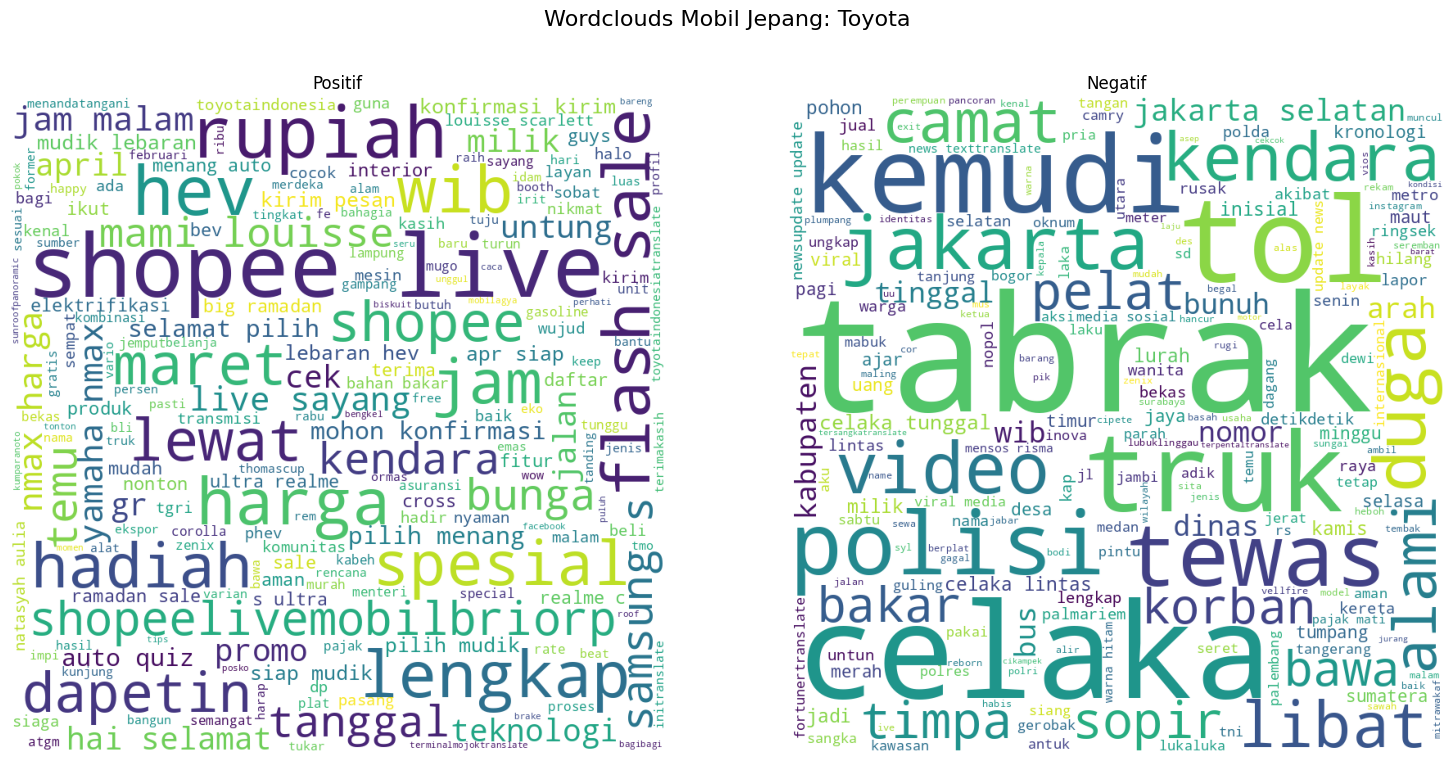

<ipython-input-17-1fe73374c008>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['stemming'] = df_positif['stemming'].astype(str)
<ipython-input-17-1fe73374c008>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif['stemming'] = df_negatif['stemming'].astype(str)


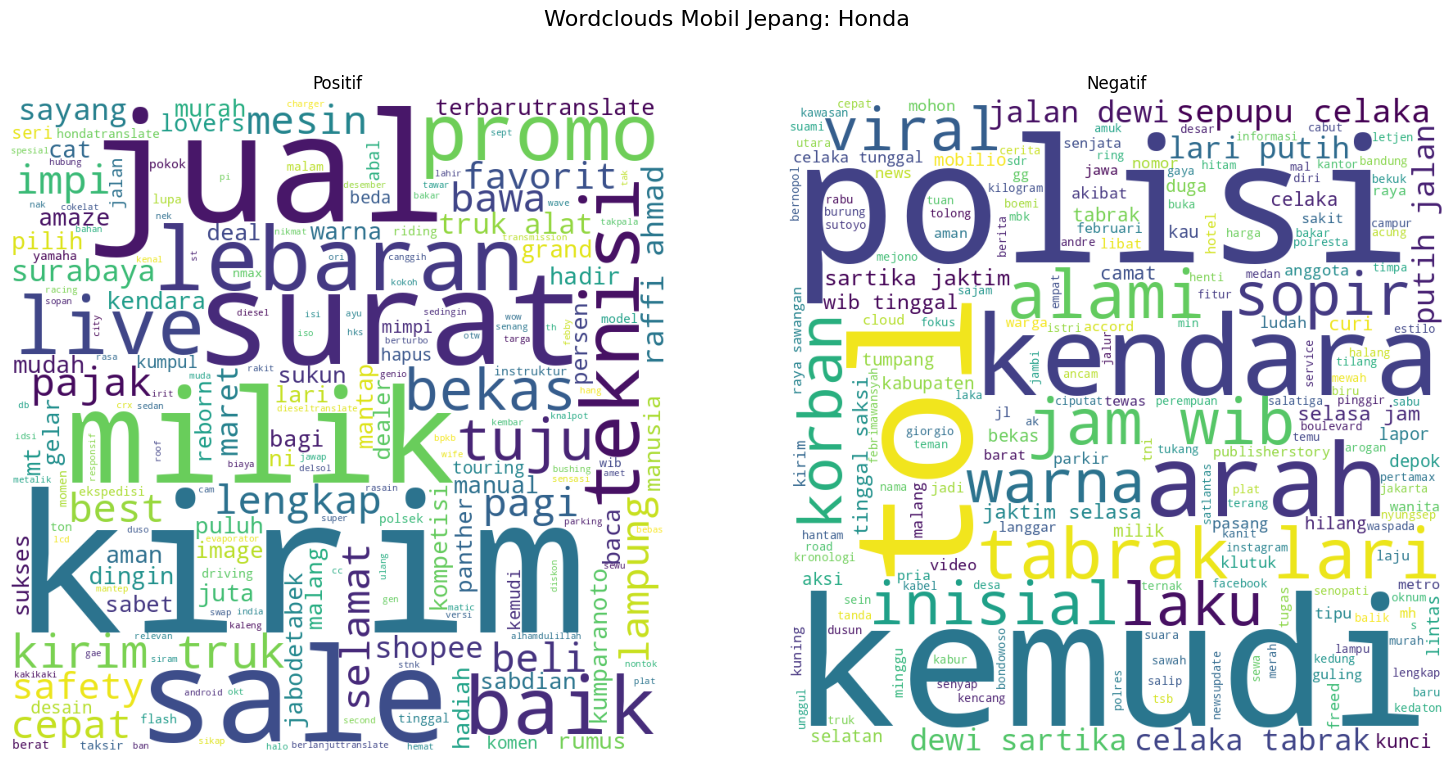

<ipython-input-17-1fe73374c008>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['stemming'] = df_positif['stemming'].astype(str)


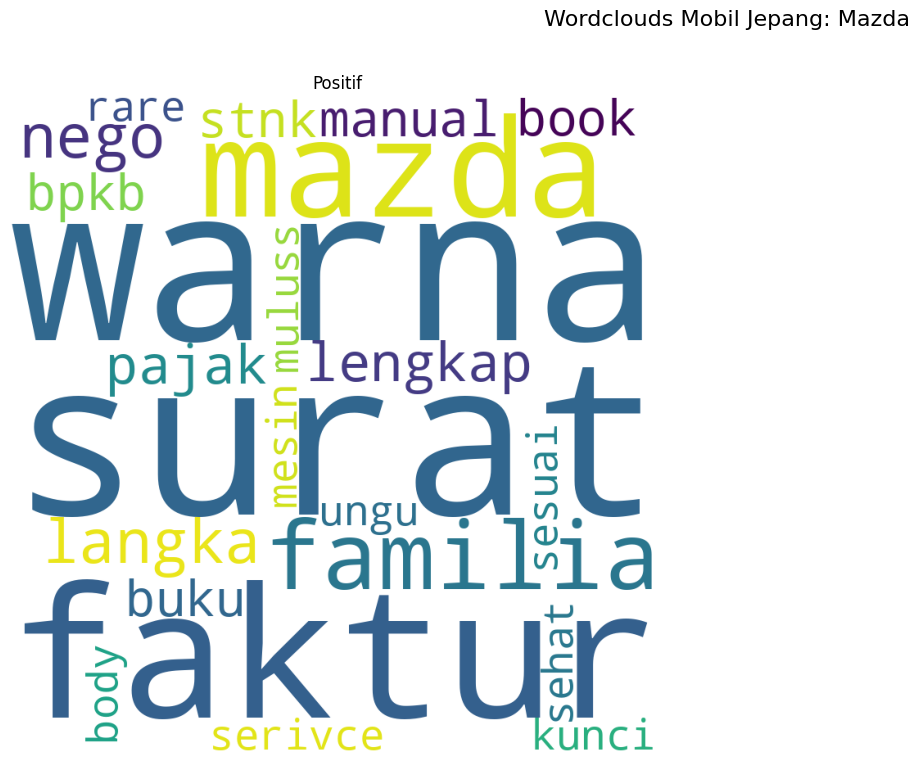

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Get unique entities
entities = dfEDA['entity'].unique()

# Create wordclouds for each entity and sentiment
for entity in entities:
    # Filter DataFrame for entity and sentiments
    df_positif = dfEDA[(dfEDA['entity'] == entity) & (dfEDA['sentiment'] == 'Positif')]
    df_negatif = dfEDA[(dfEDA['entity'] == entity) & (dfEDA['sentiment'] == 'Negatif')]

    # Convert 'stemming' column to strings
    df_positif['stemming'] = df_positif['stemming'].astype(str)
    df_negatif['stemming'] = df_negatif['stemming'].astype(str)

    # Create text for wordclouds if there are words, otherwise set to None to skip
    text_positif = ' '.join(df_positif['stemming']) if not df_positif.empty else None
    text_negatif = ' '.join(df_negatif['stemming']) if not df_negatif.empty else None

    # Create wordclouds if text is not None
    stopwords = set(STOPWORDS)
    if text_positif:
        wordcloud_positif = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(text_positif)
    if text_negatif:
        wordcloud_negatif = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(text_negatif)

    # Plot wordclouds if they were generated
    plt.figure(figsize=(16, 8), facecolor=None)
    plt.suptitle(f"Wordclouds Mobil Jepang: {entity}", fontsize=16)

    if text_positif:
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud_positif)
        plt.axis("off")
        plt.title("Positif")

    if text_negatif:
        plt.subplot(1, 2, 2)
        plt.imshow(wordcloud_negatif)
        plt.axis("off")
        plt.title("Negatif")

    plt.tight_layout(pad=3.0)
    plt.show()

1. Daihatsu
* Positif: “saldo astrapay”, “astrapay”, “selamat”, “saldo”, “daihatsuquiz”

Banyak sentimen positif dari Daihatsu membahas sayembara atau quiz berhadiah saldo astrapay guna promosi dan meningkatkan engagement.

*Negatif: “tabrak”, “selamat”, “duga”, “celaka”, “polisi”, “tol”

Sentimen negatif dari Daihatsu disebabkan banyak berita mengenai pengemudi mobil Daihatsu yang melakukan kecelakaan di jalan raya ataupun jalan tol.

2. Mitsubishi
* Positif: “jual”, “promo”, “hadir”, “hadiah”

Sentimen positif dari Mitsubishi membahas banyak sales dari Mitsubishi yang melakukan promo dan memberikan hadiah bagi para konsumen pabrikan ini.

* Negatif: “tabrak”, “lindas main”, “alami celaka”, “main rumah”, “showroom”, “porsche”

Sentimen negatif dari Mitsubishi disebabkan berita mengenai pengemudi Pajero Sport yang terlibat kecelakaan karena melindas balita yang sedang bermain di depan rumahnya dan berita pengemudi Xpander yang menabrak Porsche di showroom mobil mewah Ivan Motors.

3. Suzuki
* Positif: “butuh”, “kendara”, “nyaman”, “muat”, “promo”

Sentimen positif dari Suzuki kebanyakan dari promosi pabrikan ini mengenai produknya, yaitu XL7 yang nyaman dan Carry yang memuat banyak barang bawaan.

* Negatif: “kereta api”, “lintas palang”, “celaka”, “tabrak kereta”, “baleno”

Sentimen negatif dari Suzuki dikarenakan terdapat berita mengenai pengemudi Baleno yang menerobos lintasan kereta api, dan ditabrak oleh KA Argo Meru.

4. Toyota
* Positif: “shopee live”, “dapetin”, “flash sale”, “shopee”

Sentimen positif dari Toyota kebanyakan mengenai campaign flash sale Toyota Agya di Shopee Live seharga Rp1.

* Negatif: “tabrak”, “celaka”, “tewas”, “truk”

Sentimen negatif dari Toyota disebabkan banyak berita mengenai pengemudi mobil Toyota yang melakukan kecelakaan di jalan raya ataupun jalan tol.

5. Honda
* Positif: “jual”, “promo”, “sale”, “kirim”, “lebaran”

Sentimen positif dari Honda mengenai promosi produknya dan pengirimannya selama lebaran.

* Negatif: “polisi”, “kemudi”, “tabrak lari”, “tol”, “korban”

Sentimen negatif dari Honda disebabkan banyak berita mengenai pengemudi mobil Honda yang melakukan tabrak lari di jalan tol.

5. Mazda
* Positif: “warna”, “surat”, “faktur”

Sentimen positif Mazda merupakan iklan penjualan mobil bekas Mazda yang masih dalam kondisi yang baik, warna yang langka, dan surat-surat kendaraan lengkap.

* Negatif: -


## Model Building

In [19]:
from sklearn.utils import resample

# Undersample 'Netral' and 'Negatif' to match 'Positif' count
positif_count = dfEDA[dfEDA['sentiment'] == 'Positif'].shape[0]

neutral_undersampled = resample(dfEDA[dfEDA['sentiment'] == 'Netral'],
                                replace=False,
                                n_samples=positif_count,
                                random_state=42)

negatif_undersampled = resample(dfEDA[dfEDA['sentiment'] == 'Negatif'],
                                replace=False,
                                n_samples=positif_count,
                                random_state=42)

# Combine the undersampled classes with the original 'Positif' class
dfEDA_undersampled = pd.concat([neutral_undersampled, negatif_undersampled, dfEDA[dfEDA['sentiment'] == 'Positif']])

# Shuffle the DataFrame
dfEDA_undersampled = dfEDA_undersampled.sample(frac=1, random_state=42)

In [20]:
dfEDA_undersampled['sentiment'].value_counts()

sentiment
Positif    464
Netral     464
Negatif    464
Name: count, dtype: int64

### LSTM

In [21]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

In [22]:
dfModel = dfEDA_undersampled[['stemming', 'sentiment']]

In [23]:
# Convert sentiment labels to numeric values
label_encoder = LabelEncoder()
dfModel['sentiment'] = label_encoder.fit_transform(dfModel['sentiment'])

<ipython-input-23-1deb4f3f266e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfModel['sentiment'] = label_encoder.fit_transform(dfModel['sentiment'])


In [24]:
# Splitting the data into train and test sets with a ratio of 80:20
train_data, test_data = train_test_split(dfModel, test_size=0.2, random_state=1507)

In [25]:
# Define a custom dataset
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        tokens = self.tokenizer.encode(text, add_special_tokens=True)
        return torch.tensor(tokens), torch.tensor(label)

In [26]:
# Tokenize and create DataLoader
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    return texts_padded, labels

# Create datasets
train_dataset = TweetDataset(train_data['stemming'], train_data['sentiment'])
test_dataset = TweetDataset(test_data['stemming'], test_data['sentiment'])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.num_layers = num_layers # store num_layers as an attribute
        self.hidden_size = hidden_size # store hidden_size as an attribute

    def forward(self, x):
        x = self.embedding(x)
        # Initialize hidden state with correct shape
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        return out

In [31]:
# Hyperparameters
vocab_size = len(BertTokenizer.from_pretrained('bert-base-uncased').vocab)
embed_size = 512
hidden_size = 512
output_size = len(label_encoder.classes_)
num_layers = 5
num_epochs = 50
learning_rate = 0.001

In [32]:
# Instantiate the model, loss function, and optimizer
model = LSTMModel(vocab_size, embed_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
# Training the model
model.train()
for epoch in range(num_epochs):
    for texts, labels in train_loader:
        outputs = model(texts)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 1.0567
Epoch [2/50], Loss: 0.9246
Epoch [3/50], Loss: 1.0218
Epoch [4/50], Loss: 1.0072
Epoch [5/50], Loss: 1.1140
Epoch [6/50], Loss: 0.9508
Epoch [7/50], Loss: 0.9712
Epoch [8/50], Loss: 0.9685
Epoch [9/50], Loss: 0.9027
Epoch [10/50], Loss: 1.1111
Epoch [11/50], Loss: 1.0610
Epoch [12/50], Loss: 1.0147
Epoch [13/50], Loss: 1.0592
Epoch [14/50], Loss: 1.1688
Epoch [15/50], Loss: 0.9953
Epoch [16/50], Loss: 0.9560
Epoch [17/50], Loss: 1.1571
Epoch [18/50], Loss: 0.9366
Epoch [19/50], Loss: 1.0282
Epoch [20/50], Loss: 1.0132
Epoch [21/50], Loss: 0.9401
Epoch [22/50], Loss: 0.9149
Epoch [23/50], Loss: 1.2007
Epoch [24/50], Loss: 1.0545
Epoch [25/50], Loss: 1.0683
Epoch [26/50], Loss: 1.0370
Epoch [27/50], Loss: 0.8820
Epoch [28/50], Loss: 1.1015
Epoch [29/50], Loss: 1.0996
Epoch [30/50], Loss: 0.9456
Epoch [31/50], Loss: 1.0721
Epoch [32/50], Loss: 0.9982
Epoch [33/50], Loss: 1.0873
Epoch [34/50], Loss: 1.0079
Epoch [35/50], Loss: 1.0061
Epoch [36/50], Loss: 1.0703
E

## Save Model

In [35]:
# Assuming 'model' is your trained model and 'optimizer' is your optimizer
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, 'sentiment_predict_model.pth')

In [36]:
import torch.quantization

# Assuming 'model' is your trained model
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save the quantized model
torch.save(quantized_model.state_dict(), 'prediction_model.pth')

Link Drive Model

https://drive.google.com/drive/folders/1SmS3MjyhqKV3Y6qsv0s8aZBUbbnSCmZ8?usp=sharing

In [ ]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 62.01%
